# Example Cell5
     1. Running METROID with all parameters at default
        * Results
            a. Without electrical stimulation
            b. Triggered action potential (AP)
            c. Triggered electroporation
    2. Running METROID with optimized parameters
        * Results
            a. Without electrical stimulation
            b. Triggered action potential (AP) (using ICA)
            c. Triggered electroporation (using wPCA with Haar)
    3. Membrane potential calculation
        * Membrane potential results

__Load dependencies__

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys,os
    
metroidpath = os.path.abspath('../')
if metroidpath not in sys.path:
    sys.path.append(metroidpath)
items = os.listdir(metroidpath)
if 'MESS.py' not in items:
    ! jupyter nbconvert --to python ../MESS.ipynb --output-dir ../
if 'Remove_Photobleaching.py' not in items:
    ! jupyter nbconvert --to 'python' ../Remove_Photobleaching.ipynb --output-dir ../
if 'BSSD.py' not in items:
    ! jupyter nbconvert --to 'python' ../BSSD.ipynb --output-dir ../
if 'METROID.py' not in items:
    ! jupyter nbconvert --to 'python' ../METROID.ipynb --output-dir ../
import MESS as mes
import Remove_Photobleaching as rpb
import BSSD as bssd
import METROID as metroid

## Mandatory Parameters:
__User can edit the cell below__

In [2]:
fpath = os.path.join('../Data','Cell5')
fr_list = [67.33, 67.33, 67.33, 67.33] #Cell5
transitory=None

## 1. Running METROID with all parameters at default
    - estimated t_sig_onset;
    - estimated t_sig_end;
    - default method ('ICA');
    - default n_comp (2);
    - default wavelet ('Haar');
    - autoselect source with signal.

#### a. Video without electrical stimulation (video0)

In [3]:
v0path = os.path.join(fpath,'video0')
transitory = None

stack_ROIs_0, label_ROIs_0, ROIs_means_filtered_0, time_0, \
ROIs_means_0, ROIs_means_corrected_0,  \
mask_list_0, components_0, selected_source_idx_0, \
t_sig_prop_0, SNR_dB_0 = metroid.metroid(v0path, fr_list[0], transitory)

#### b. Videos with triggered action potential (videos_AP)

In [4]:
vmidpath = os.path.join(fpath,'videos_AP')
transitory = True

stack_ROIs_AP, label_ROIs_AP, ROIs_means_filtered_AP, time_AP, \
ROIs_means_AP, ROIs_means_corrected_AP,  \
mask_list_AP, components_AP, selected_source_idx_AP, \
t_sig_prop_AP, SNR_dB_AP = metroid.metroid(vmidpath, fr_list[1:-1], transitory)

#### c. Video with triggered electroporation (video_EP)

In [5]:
vlastpath = os.path.join(fpath,'video_EP')
transitory = False

stack_ROIs_EP, label_ROIs_EP, ROIs_means_filtered_EP, time_EP, \
ROIs_means_EP, ROIs_means_corrected_EP,  \
mask_list_EP, components_EP, selected_source_idx_EP, \
t_sig_prop_EP, SNR_dB_EP = metroid.metroid(vlastpath, fr_list[-1], transitory)                                       

### Results
#### a. Video without electrical stimulation (video0)

In [6]:
nregions = np.amax(label_ROIs_0).astype(int)
ncolors = nregions
from matplotlib import cm
from matplotlib.colors import ListedColormap
brg = cm.get_cmap('brg', nregions)
newcolors = np.tile((np.arange(0,ncolors))/(ncolors-1),nregions//(ncolors-1))
newcolors = newcolors[:nregions]
newcolors = brg(newcolors)
black = np.array([0, 0, 0, 1])
newcolors = np.insert(newcolors,0,black,axis=0)
newcmp = ListedColormap(newcolors)

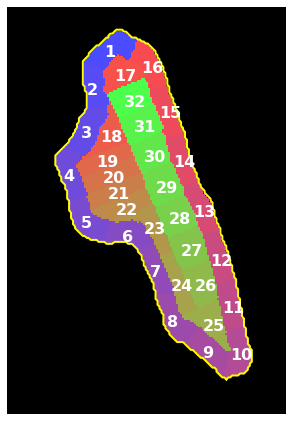

In [7]:
fig, ax = plt.subplots(figsize=[5,10],nrows=1, ncols=1)
ax.imshow(label_ROIs_0, cmap=newcmp)

cent_coord = np.zeros((nregions,2))
fontsize=16
for j in range(nregions):
    cent_coord[j,:] = np.rint(mes.get_centroid(stack_ROIs_0[j,:,:]))
    offset = -fontsize//2
    ax.annotate(j+1,(cent_coord[j,0],cent_coord[j,1]),xycoords='data',xytext=(offset, offset),
                textcoords='offset points',color='white',fontsize=fontsize,weight='bold')
ax.axis('off')
contour = mes.build_contour(mask_list_0[0])
ax.imshow(mask_list_0[0],cmap='gray',alpha=0.3)
ax.plot(contour[:,1],contour[:,0],color='yellow',lw=2)

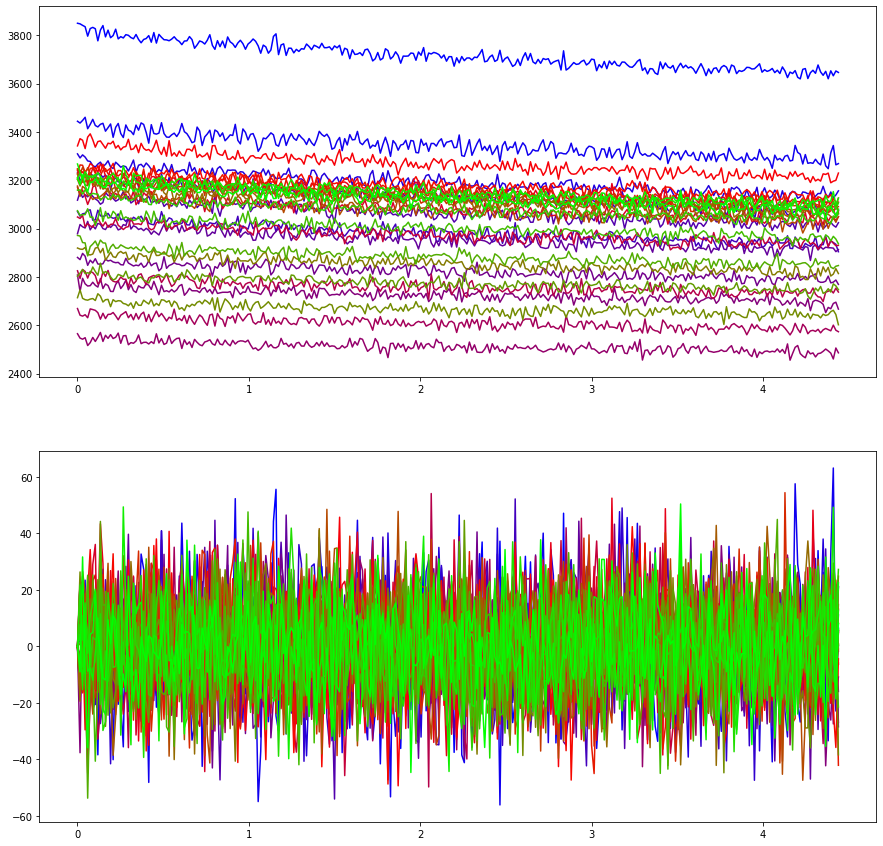

In [8]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=[15,15])
for j in range(stack_ROIs_0.shape[0]):
    ax[0].plot(time_0,ROIs_means_0[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_0,ROIs_means_corrected_0[:,j],color=newcolors[j+1,:])

#### b. Videos with triggered action potential (videos_AP)

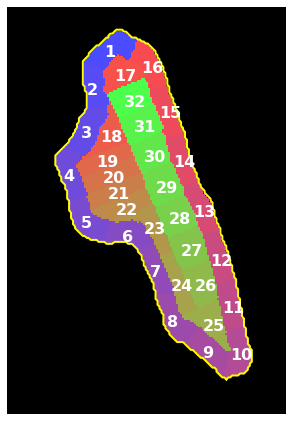

In [9]:
fig, ax = plt.subplots(figsize=[5,10],nrows=1, ncols=1)
ax.imshow(label_ROIs_AP, cmap=newcmp)

cent_coord = np.zeros((nregions,2))
fontsize=16
for j in range(nregions):
    cent_coord[j,:] = np.rint(mes.get_centroid(stack_ROIs_AP[j,:,:]))
    offset = -fontsize//2
    ax.annotate(j+1,(cent_coord[j,0],cent_coord[j,1]),xycoords='data',xytext=(offset, offset),
                textcoords='offset points',color='white',fontsize=fontsize,weight='bold')
ax.axis('off')
contour = mes.build_contour(mask_list_AP[0])
ax.imshow(mask_list_AP[0],cmap='gray',alpha=0.3)
ax.plot(contour[:,1],contour[:,0],color='yellow',lw=2)

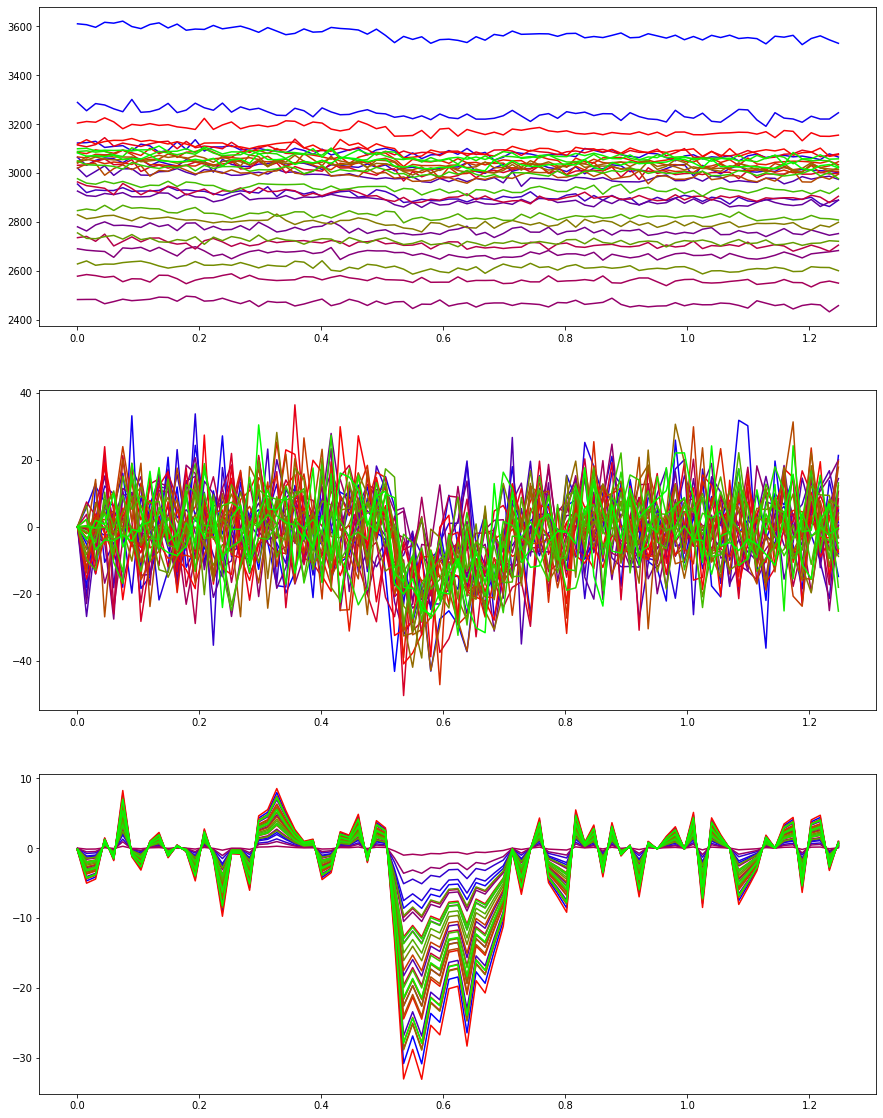

In [10]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=[15,20])
for j in range(stack_ROIs_AP.shape[0]):
    ax[0].plot(time_AP,ROIs_means_AP[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_AP,ROIs_means_corrected_AP[:,j],color=newcolors[j+1,:])
    ax[2].plot(time_AP,ROIs_means_filtered_AP[:,j],color=newcolors[j+1,:])

In [11]:
print('Signal onset time: %.3f' % t_sig_prop_AP[0],'s\n')
print('Signal end time: %.3f' % t_sig_prop_AP[1],'s\n')
print('Signal-to-Noise Ratio per ROI:\n',SNR_dB_AP,'dB')

Signal onset time: 0.535 s

Signal end time: 0.713 s

Signal-to-Noise Ratio per ROI:
 [ -0.77818671 -16.16615624 -14.33051654 -18.10006282  -2.51401428
  -6.457402    -3.74438451  -9.04745003 -11.8589839  -19.36009271
 -30.00975006 -11.41889252  -6.04561971  -3.47428888  -9.8546892
  -5.05030982  -1.01450686  -3.939052    -2.26432799  -7.63801777
  -5.63213326  -3.8242033   -2.14945058  -3.35129223  -6.0518054
 -10.07719168  -6.46850156  -5.04878387  -7.04386687  -8.81833607
  -4.11120422  -2.85824222] dB


#### c. Video with triggered electroporation (video_EP)

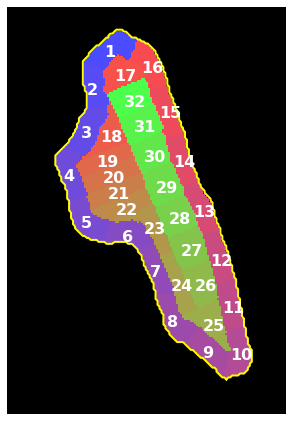

In [12]:
fig, ax = plt.subplots(figsize=[5,10],nrows=1, ncols=1)
ax.imshow(label_ROIs_EP, cmap=newcmp)

cent_coord = np.zeros((nregions,2))
fontsize=16
for j in range(nregions):
    cent_coord[j,:] = np.rint(mes.get_centroid(stack_ROIs_EP[j,:,:]))
    offset = -fontsize//2
    ax.annotate(j+1,(cent_coord[j,0],cent_coord[j,1]),xycoords='data',xytext=(offset, offset),
                textcoords='offset points',color='white',fontsize=fontsize,weight='bold')
ax.axis('off')
contour = mes.build_contour(mask_list_EP[0])
ax.imshow(mask_list_EP[0],cmap='gray',alpha=0.3)
ax.plot(contour[:,1],contour[:,0],color='yellow',lw=2)

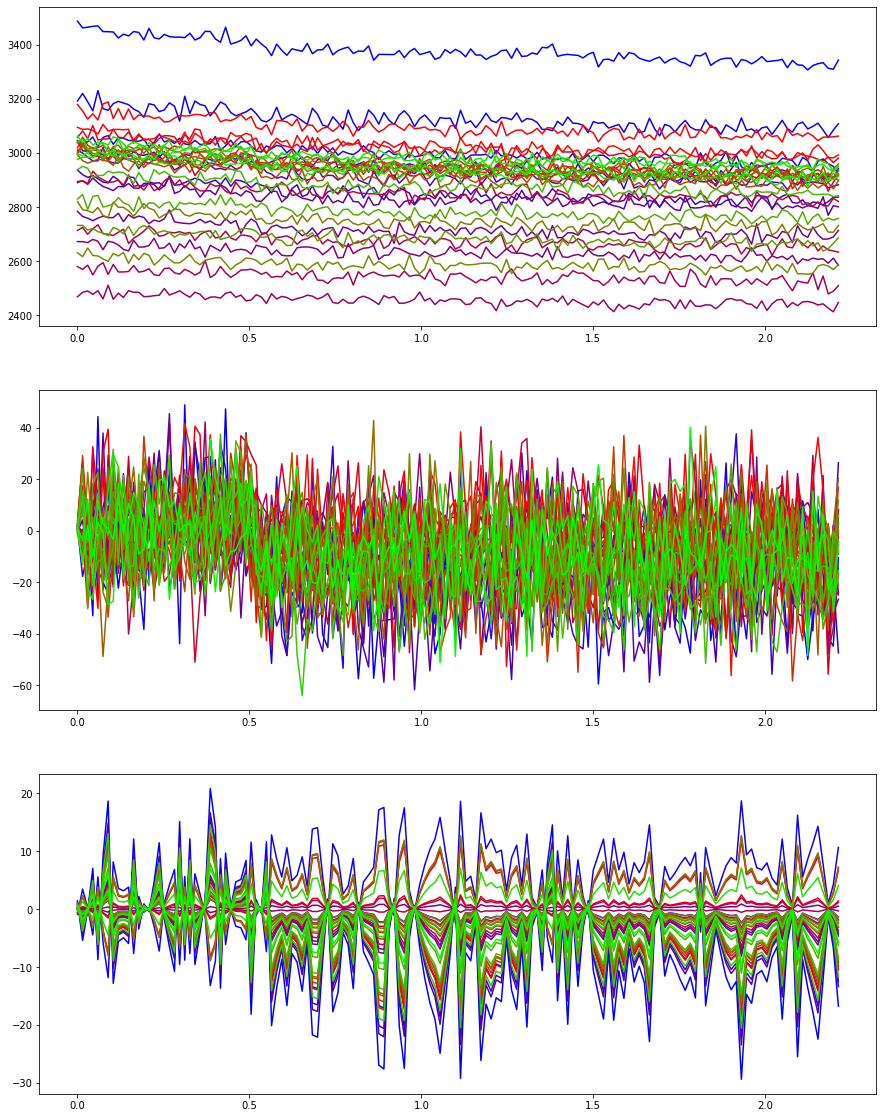

In [13]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=[15,20])
for j in range(stack_ROIs_EP.shape[0]):
    ax[0].plot(time_EP,ROIs_means_EP[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_EP,ROIs_means_corrected_EP[:,j],color=newcolors[j+1,:])
    ax[2].plot(time_EP,ROIs_means_filtered_EP[:,j],color=newcolors[j+1,:])

__It can be seen by the graphic above that the automatic selected source was incorrect, which means that user should either change source selection to manual or try a different filtering method (PCA or wPCA for example). This is done below.__

In [14]:
print('Signal onset time: %.3f' % t_sig_prop_EP[0],'s\n')
print('Signal end time:', t_sig_prop_EP[1],'\n')
print('Signal-to-Noise Ratio per ROI:\n',SNR_dB_EP,'dB')

Signal onset time: 0.579 s

Signal end time: None 

Signal-to-Noise Ratio per ROI:
 [ -1.60815173  -9.38963459  -4.82986692 -21.69732982  -2.22699749
  -3.15525835 -13.31416537 -31.23729519 -12.48310766 -18.81272098
 -35.87484724 -14.33875976 -25.35045378 -23.40623134 -11.02659265
  -7.10546951  -9.06819483 -18.53303564  -6.58887474 -15.56082582
  -4.77249468 -20.63128322  -7.36946658  -8.68853499 -22.47688997
 -16.87806516 -11.17993128  -8.4541666   -4.42460912 -13.76234383
 -16.57572987  -9.87502506] dB


## 2. Running METROID with optimized parameters
    - estimated t_sig_onset = 0.5sec (0.5sec for EP video);
    - estimated t_sig_end = 0.8sec (None for EP video);
    - method ('ICA' for AP videos and 'wPCA' for EP video);
    - default n_comp (2, but 3 for EP video);
    - wavelet: Haar; for EP video
    - manual selection of source with signal.

#### a. Video without electrical stimulation (video0)

In [15]:
v0path = os.path.join(fpath,'video0')
transitory = None

stack_ROIs_0, label_ROIs_0, ROIs_means_filtered_0, time_0, \
ROIs_means_0, ROIs_means_corrected_0,  \
mask_list_0, components_0, selected_source_idx_0, \
t_sig_prop_0, SNR_dB_0 = metroid.metroid(v0path, fr_list[0], transitory)

#### b. Videos with triggered action potential (videos_AP, using ICA)

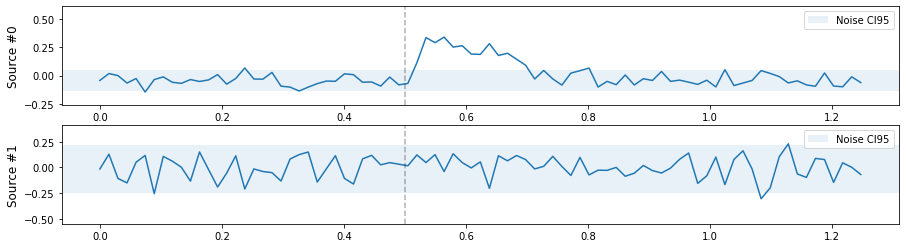

Enter one or more sources number (separate numbers by "," if number of sources > 1): 0


In [16]:
vmidpath = os.path.join(fpath,'videos_AP')
transitory = True
t_sig_onset = 0.5
t_sig_end = 0.8
n_comp = 2
wavelet = 'dmey'
method = 'ICA'
autoselect = 'manual'

stack_ROIs_AP, label_ROIs_AP, ROIs_means_filtered_AP, time_AP, \
ROIs_means_AP, ROIs_means_corrected_AP, \
mask_list_AP, components_AP, selected_source_idx_AP, \
t_sig_prop_AP, SNR_dB_AP = metroid.metroid(vmidpath, fr_list[1:-1], transitory,16,16,
                                                                  t_sig_onset,t_sig_end,
                                                                   method,n_comp,wavelet,autoselect)

#### c. Video with triggered electroporation (video_EP, using wPCA with Haar)

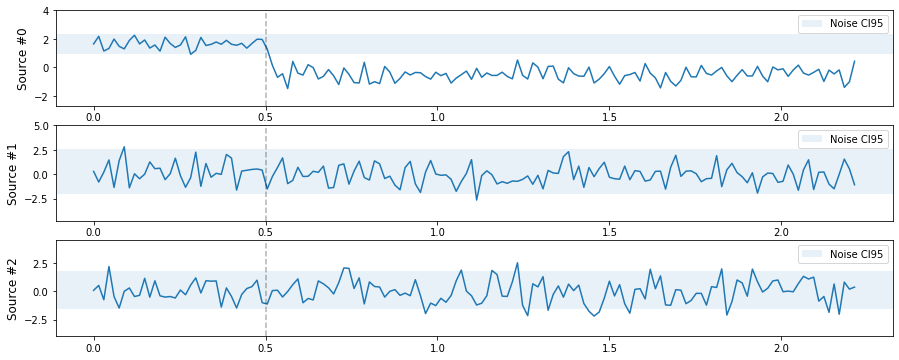

Enter one or more sources number (separate numbers by "," if number of sources > 1): 0


In [18]:
vlastpath = os.path.join(fpath,'video_EP')
transitory = False
t_sig_onset = 0.5
t_sig_end = None
n_comp = 3
wavelet = 'Haar'
method = 'wPCA'
autoselect = 'manual'

stack_ROIs_EP, label_ROIs_EP, ROIs_means_filtered_EP, time_EP, \
ROIs_means_EP, ROIs_means_corrected_EP,  \
mask_list_EP, components_EP, selected_source_idx_EP, \
t_sig_prop_EP, SNR_dB_EP = metroid.metroid(vlastpath, fr_list[-1],transitory,16,16,
                                                                  t_sig_onset,t_sig_end,
                                                                   method,n_comp,wavelet,autoselect)         

### Results
#### a. Video without electrical stimulation (video0)

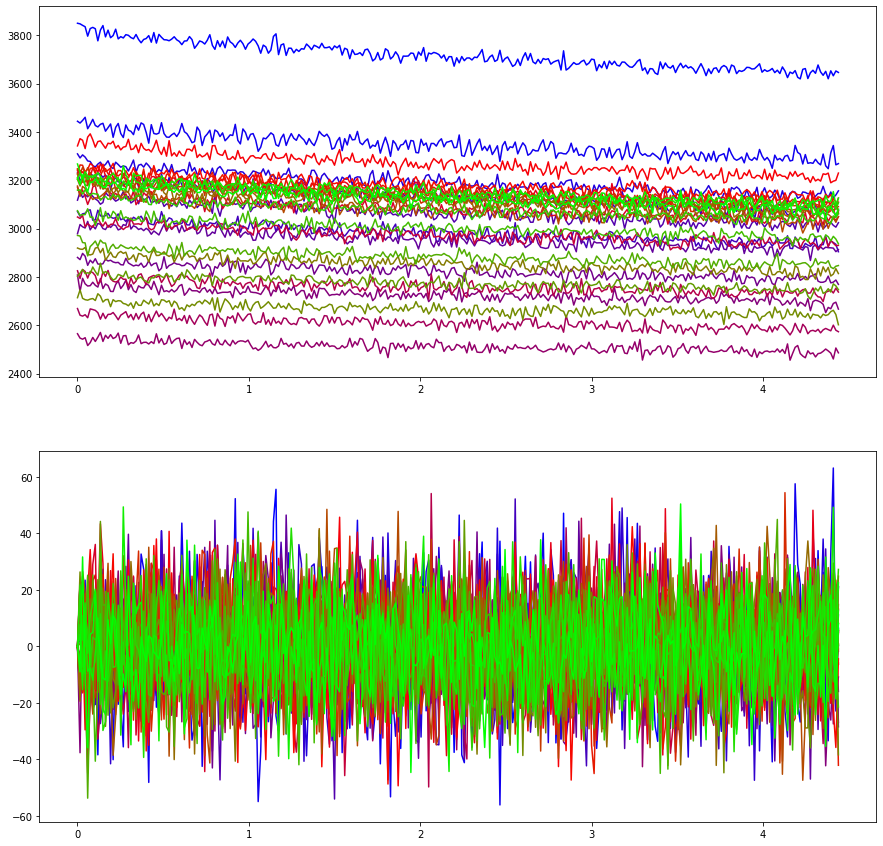

In [19]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=[15,15])
for j in range(stack_ROIs_0.shape[0]):
    ax[0].plot(time_0,ROIs_means_0[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_0,ROIs_means_corrected_0[:,j],color=newcolors[j+1,:])

#### b. Videos with triggered action potential (videos_AP, using ICA)

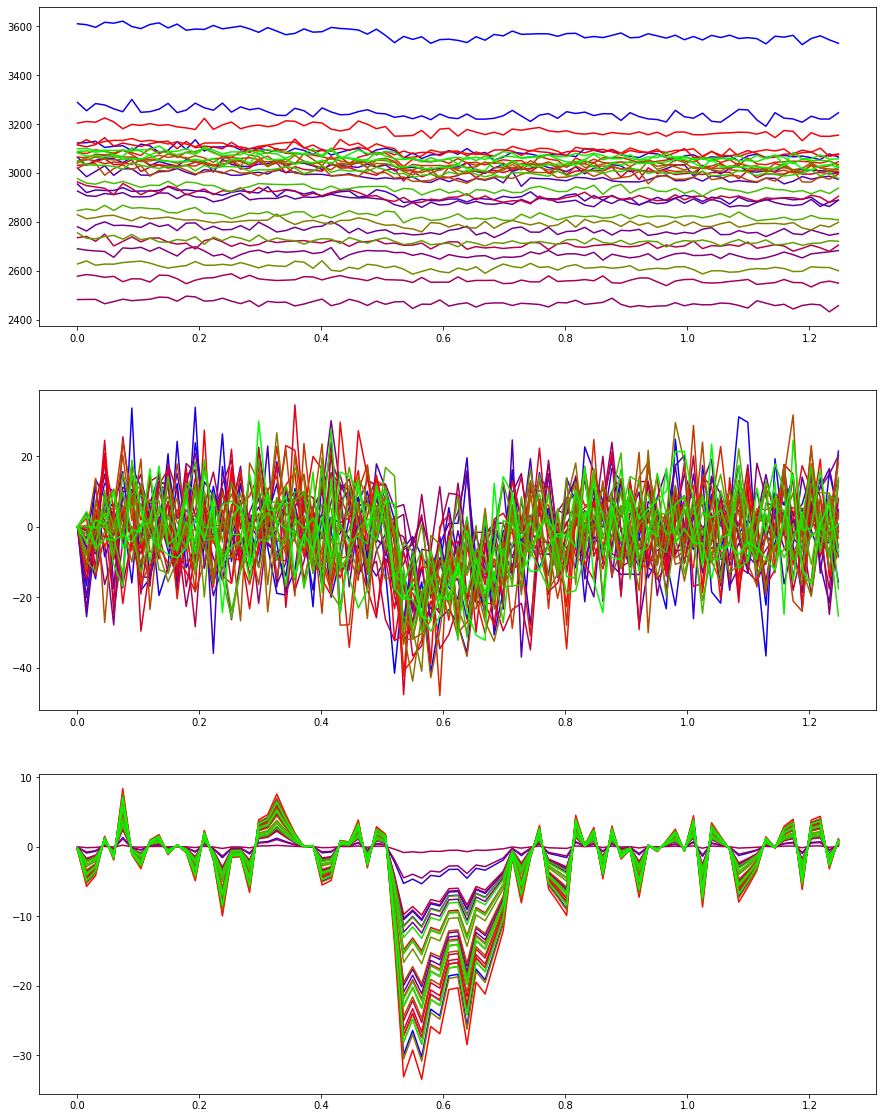

In [20]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=[15,20])
for j in range(stack_ROIs_AP.shape[0]):
    ax[0].plot(time_AP,ROIs_means_AP[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_AP,ROIs_means_corrected_AP[:,j],color=newcolors[j+1,:])
    ax[2].plot(time_AP,ROIs_means_filtered_AP[:,j],color=newcolors[j+1,:])

In [21]:
print('Signal onset time: %.3f' % t_sig_prop_AP[0],'s\n')
print('Signal end time: %.3f' % t_sig_prop_AP[1],'s\n')
print('Signal-to-Noise Ratio per ROI:\n',SNR_dB_AP,'dB')

Signal onset time: 0.500 s

Signal end time: 0.800 s

Signal-to-Noise Ratio per ROI:
 [ -1.06208068 -14.40993092 -10.74414035 -17.84646312  -2.18253449
  -5.17036376  -4.06403516  -9.15535608 -11.44249122 -17.33339694
 -31.42106984 -11.38038289  -3.02876284  -3.90237874  -8.48190678
  -4.86177307  -0.21771232  -2.50282708  -1.67609054  -5.99470057
  -5.26386406  -3.52716915  -1.22387996  -2.76457502  -4.44331882
  -8.49629706  -5.94492082  -4.05840754  -5.54752357  -8.41159168
  -2.79650009  -2.74218815] dB


#### c. Video with triggered electroporation (video_EP, using wPCA with Haar)

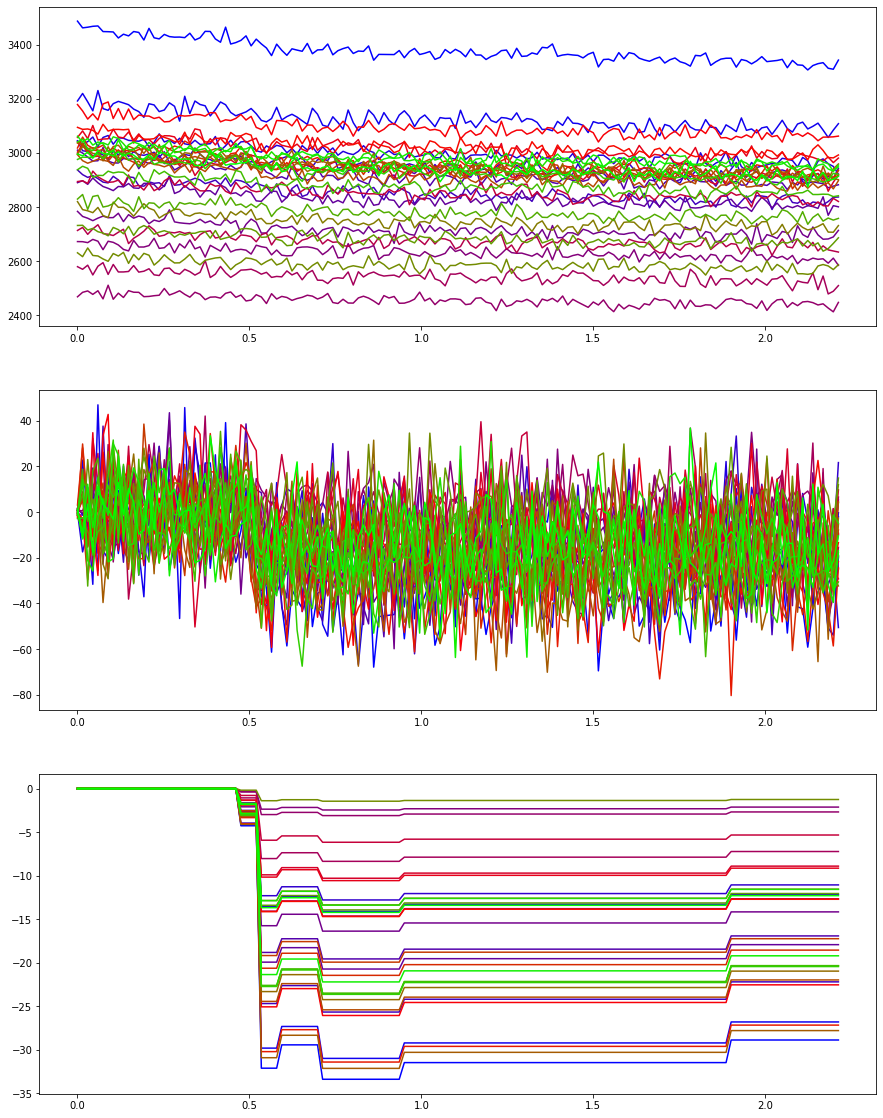

In [22]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=[15,20])
for j in range(stack_ROIs_EP.shape[0]):
    ax[0].plot(time_EP,ROIs_means_EP[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_EP,ROIs_means_corrected_EP[:,j],color=newcolors[j+1,:])
    ax[2].plot(time_EP,ROIs_means_filtered_EP[:,j],color=newcolors[j+1,:])

In [23]:
print('Signal onset time: %.3f' % t_sig_prop_EP[0],'s\n')
print('Signal end time:', t_sig_prop_EP[1],'\n')
print('Signal-to-Noise Ratio per ROI:\n',SNR_dB_EP,'dB')

Signal onset time: 0.500 s

Signal end time: None 

Signal-to-Noise Ratio per ROI:
 [  7.4251246    0.7060458   -0.30754173  -1.46958521   5.05887854
   0.52783253   1.54670526   1.2252324  -17.47970015 -13.61275594
  -6.91330045  -1.74806067  -9.84190234  -4.8069079   -6.27124503
   1.68104968  -1.56978562   6.10932986   1.24589881   1.24694322
   4.45618593   4.5903972    3.28220373  -2.29404497 -21.12877196
   0.05679152   1.71097693   2.26504246   2.90942038  -2.76528605
   2.72338601  -0.97517517] dB


## 3. Membrane potential calculation

### Calculate AP properties

Signal start and end: (0.5, 0.8) s
APD25 = 133.670 ms
APD75 = 193.079 ms


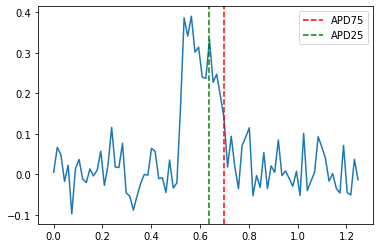

In [24]:
print('Signal start and end:',t_sig_prop_AP, 's')
#Get signal onset and end indices
t_sig_onset_idx = np.argmin(abs(time_AP - t_sig_prop_AP[0]))
if t_sig_prop_AP[1] is not None:
    t_sig_end_idx = np.argmin(abs(time_AP - t_sig_prop_AP[1]))

#Get selected source and makes signal positive
source = components_AP[:,selected_source_idx_AP]
if (abs(source.min()))>(abs(source.max())):
    source = -source
#Get source base value from innactive interval
if t_sig_prop_AP[1] is not None:
    base = np.median(np.concatenate((source[:t_sig_onset_idx],source[t_sig_end_idx:])),axis=0)
else:
    base = np.median(source[:t_sig_onset_idx])
#Get AP signal peak and peak index
peak = np.amax(source-base)
peakidx = np.argmax(source-base)

peak25 = 0.25*peak
peak75 = 0.75*peak

if t_sig_prop_AP[1] is not None:
    idx = (np.abs(source[peakidx:t_sig_end_idx] - peak75)).argmin()
else:
    idx = (np.abs(source[peakidx:] - peak75)).argmin()
idxAPD25 = idx+peakidx

APD25 = (time_AP[idxAPD25] - time_AP[t_sig_onset_idx])*1000
print('APD25 = %.3f' % APD25,'ms')

if t_sig_prop_AP[1] is not None:
    idx = (np.abs(source[peakidx:t_sig_end_idx] - peak25)).argmin()
else:
    idx = (np.abs(source[peakidx:] - peak25)).argmin()
idxAPD75 = idx+peakidx

APD75 = (time_AP[idxAPD75] - time_AP[t_sig_onset_idx])*1000
print('APD75 = %.3f' % APD75,'ms')

plt.plot(time_AP,source-base)
plt.axvline(x=time_AP[idxAPD75],ls='--',label='APD75',color='r')
plt.axvline(x=time_AP[idxAPD25],ls='--',label='APD25',color='g')
plt.legend()

### Estimated SNR

(array([-35., -30., -25., -20., -15., -10.,  -5.,   0.,   5.,  10.]),
 <a list of 10 Text yticklabel objects>)

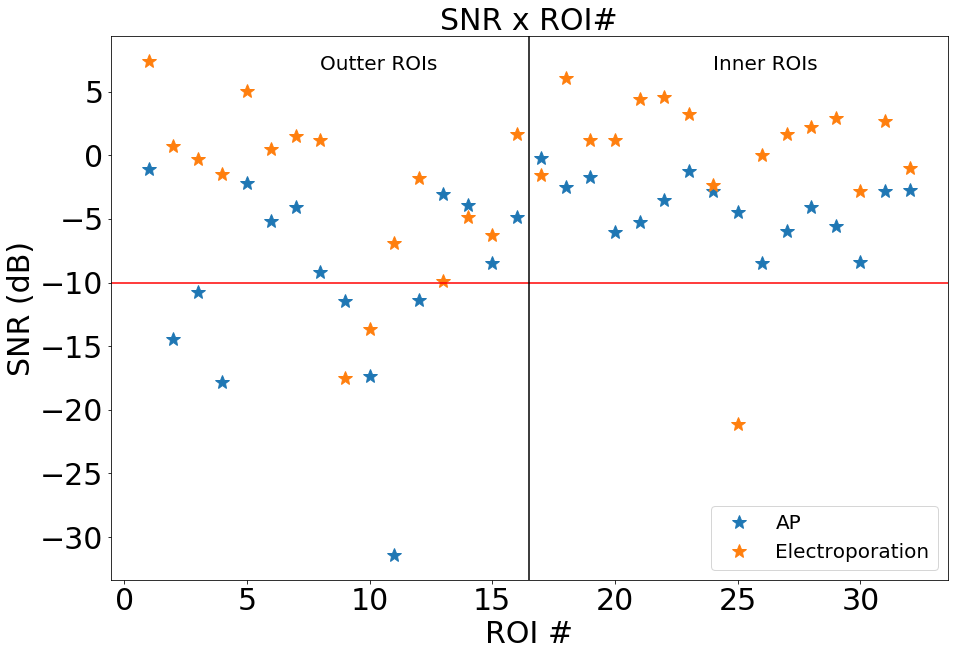

In [25]:
plt.figure(figsize=[15,10])
plt.plot(np.arange(1,nregions+1),SNR_dB_AP,'*',label='AP',ms=15)
plt.plot(np.arange(1,nregions+1),SNR_dB_EP,'*',label='Electroporation',ms=15)
plt.title('SNR x ROI#',fontsize=30)
plt.xlabel('ROI #',fontsize=30)
plt.ylabel('SNR (dB)',fontsize=30)
plt.axhline(y=-10, color='r')
plt.axvline(x=nregions//2+0.5,color='k')
plt.annotate('Outter ROIs',(nregions//4,0.9*(np.amax([np.amax(SNR_dB_EP),np.amax(SNR_dB_AP)]))),fontsize=20)
plt.annotate('Inner ROIs',(nregions//2+(nregions//4),0.9*(np.amax([np.amax(SNR_dB_EP),np.amax(SNR_dB_AP)]))),fontsize=20)
plt.legend(fontsize=20,loc=4)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

### Noise Reduction Calculation

In [26]:
if t_sig_prop_AP[1] is None:
    innactive_mask_AP = ((time_AP>0) & (time_AP<t_sig_prop_AP[0]-0.1))
else:
    innactive_mask_AP = ((time_AP>0) & (time_AP<t_sig_prop_AP[0]-0.1)) | ((time_AP>t_sig_prop_AP[1]))
noise_AP = bssd.get_noise_power(ROIs_means_corrected_AP,time_AP,innactive_mask_AP)
noise_AP_filt = bssd.get_noise_power(ROIs_means_filtered_AP,time_AP,innactive_mask_AP)
active_mask_AP = np.invert(innactive_mask_AP)

AP_noise_Reduction = noise_AP_filt/noise_AP
AP_noise_Reduction_mean = np.mean((1-AP_noise_Reduction)*100)
np.set_printoptions(precision=2)
print('AP mean noise reduction: %.2f' % AP_noise_Reduction_mean,'%')

AP mean noise reduction: 93.53 %


In [27]:
innactive_mask_EP = ((time_EP>0) & (time_EP<t_sig_prop_EP[0]-0.1))
active_mask_EP = np.invert(innactive_mask_EP)
noise_EP = bssd.get_noise_power(ROIs_means_corrected_EP,time_EP,innactive_mask_EP)
noise_EP_filt = bssd.get_noise_power(ROIs_means_filtered_EP,time_EP,innactive_mask_EP)

EP_noise_Reduction = noise_EP_filt/noise_EP
EP_noise_Reduction_mean = np.mean((1-EP_noise_Reduction)*100)
np.set_printoptions(precision=2)
print('Electroporation mean noise reduction: %.2f' % EP_noise_Reduction_mean,'%')

Electroporation mean noise reduction: 100.00 %


## Calibration

In [28]:
AP_amplitude = 120
Resting = -80

In [29]:
AP_max = np.amax(abs(ROIs_means_corrected_AP),axis=0)
AP_filtered_max = np.amax(abs(ROIs_means_filtered_AP),axis=0)

print('AP_max = \n',AP_max)
print('AP_filtered_max = \n',AP_filtered_max)

AP_max = 
 [41.55 36.64 33.95 35.92 32.49 36.99 29.53 30.17 27.85 24.84 22.62 28.36
 36.61 47.65 34.65 38.69 40.98 42.46 47.9  33.28 36.77 42.8  43.78 41.01
 31.87 23.43 30.04 31.37 28.7  32.19 29.63 32.2 ]
AP_filtered_max = 
 [30.2  10.6  11.48  5.33 27.41 20.14 21.14 12.42 10.4   4.53  0.85  9.83
 25.27 26.63 15.01 21.89 33.42 27.47 28.39 19.71 24.68 23.1  30.82 23.22
 16.81 11.6  15.56 22.15 15.37 13.18 23.19 28.33]


In [30]:
AP_filt = ((-(ROIs_means_filtered_AP)/AP_filtered_max)*AP_amplitude)+Resting
AP = ((-(ROIs_means_corrected_AP)/AP_max)*AP_amplitude)+Resting

In [31]:
EP_filt = ((-(ROIs_means_filtered_EP)/AP_filtered_max)*AP_amplitude)+Resting
EP = ((-(ROIs_means_corrected_EP)/AP_filtered_max)*AP_amplitude)+Resting

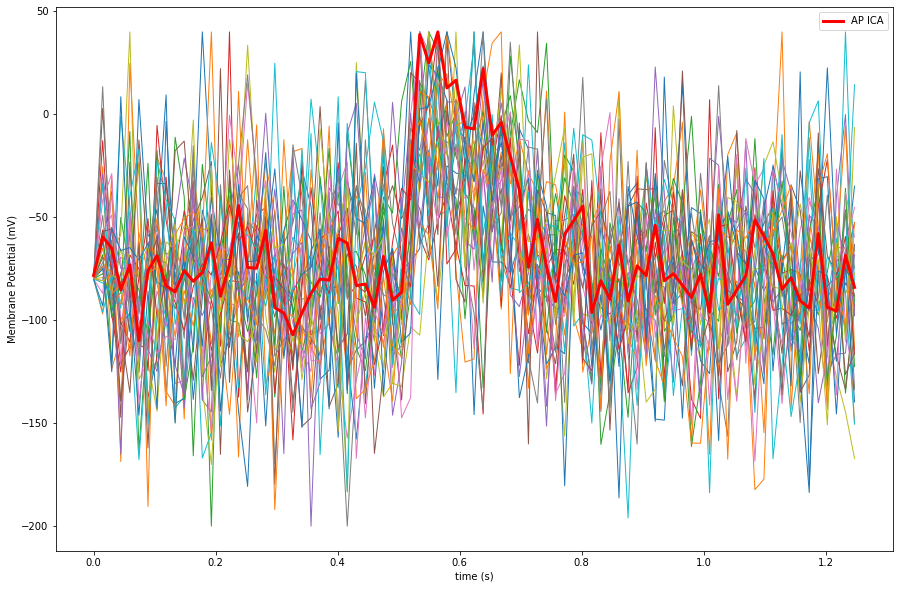

In [32]:
plt.figure(figsize=[15,10])
plt.plot(time_AP,AP,linewidth=1)
plt.plot(time_AP,AP_filt[:,0],linewidth=3,color='red',label = 'AP ICA')
plt.xlabel('time (s)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()

### Save data

In [33]:
name = 'ROIs_means_'
output_path = os.path.join(fpath,'Outputs')
ftxtname = os.path.join(output_path,name + 'AP.csv')
fobj = open(ftxtname,mode="w")
fobj.write("time;APfilt;AP\n")

roi_str = 'ROI#'
line=''
for i in range(nregions):
    line = line + roi_str + str(i+1) + ';'
secondline = ';ROI#1;' + line +'\n'
fobj.write(secondline)

values = AP_filt[:,0]
matrix = np.zeros((len(time_AP),nregions+2))
matrix[:,0] = time_AP
matrix[:,1] = AP_filt[:,0]
matrix[:,2:] = AP

fmt0 = ['%.3f']
for i in range(nregions+1):
    fmt0.append('%.2f')
np.savetxt(fobj, matrix,fmt=fmt0, delimiter=';', newline='\n')

fobj.close()

In [34]:
ftxtname = os.path.join(output_path,name + 'EP.csv')
fobj = open(ftxtname,mode="w")
dotc = ';'
for i in range((nregions)-1):
    dotc = dotc + ';'
firstline = 'time;EPfilt' + dotc + 'EP\n'
fobj.write(firstline)

roi_str = 'ROI#'
line=''
for i in range(nregions):
    line = line + roi_str + str(i+1) + ';'
secondline = ';' + line + line + '\n'
fobj.write(secondline)

matrix = np.zeros((len(time_EP),(2*(nregions))+1))
matrix[:,0] = time_EP
matrix[:,1:(nregions)+1] = EP_filt
matrix[:,(nregions)+1:(2*(nregions))+1] = EP
fmt0 = ['%.3f']
for i in range((2*(nregions))):
    fmt0.append('%.2f')
np.savetxt(fobj, matrix,fmt=fmt0, delimiter=';', newline='\n')

fobj.close()

## Plot data

In [35]:
def build_contour_ROIs(msk):
    '''Generates a gray contour from binary masks and extracts the contour'''
    import scipy.ndimage as sm
    import numpy as np
    from skimage import measure
    contour = measure.find_contours(msk, 0.8, positive_orientation = 'high')
    
    if len(contour)>1:
        largest = np.size(contour[0])
        for c in contour:
            if np.size(c)>np.size(largest):
                largest = c
        contour=largest
    else:
        contour = contour[0]
    contour = np.around(contour)
    return(contour)

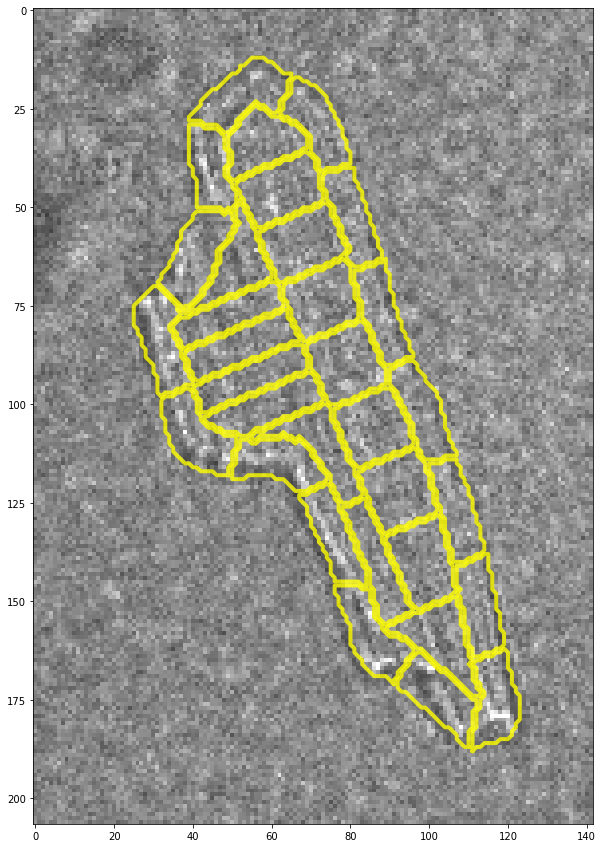

In [36]:
from skimage import io
snap = io.imread(os.path.join(fpath,'video_EP','snap.tif'))
plt.figure(figsize=[25,15])
plt.imshow(snap,cmap='gray',vmin=0,vmax=np.amax(snap))
contour = np.zeros_like(label_ROIs_EP,bool)
for i in range(nregions):
    contour = build_contour_ROIs(stack_ROIs_EP[i])
    plt.plot(contour[:,1],contour[:,0],color='yellow',lw=4,alpha=0.8)

### Membrane potential results
#### ROI signal x time

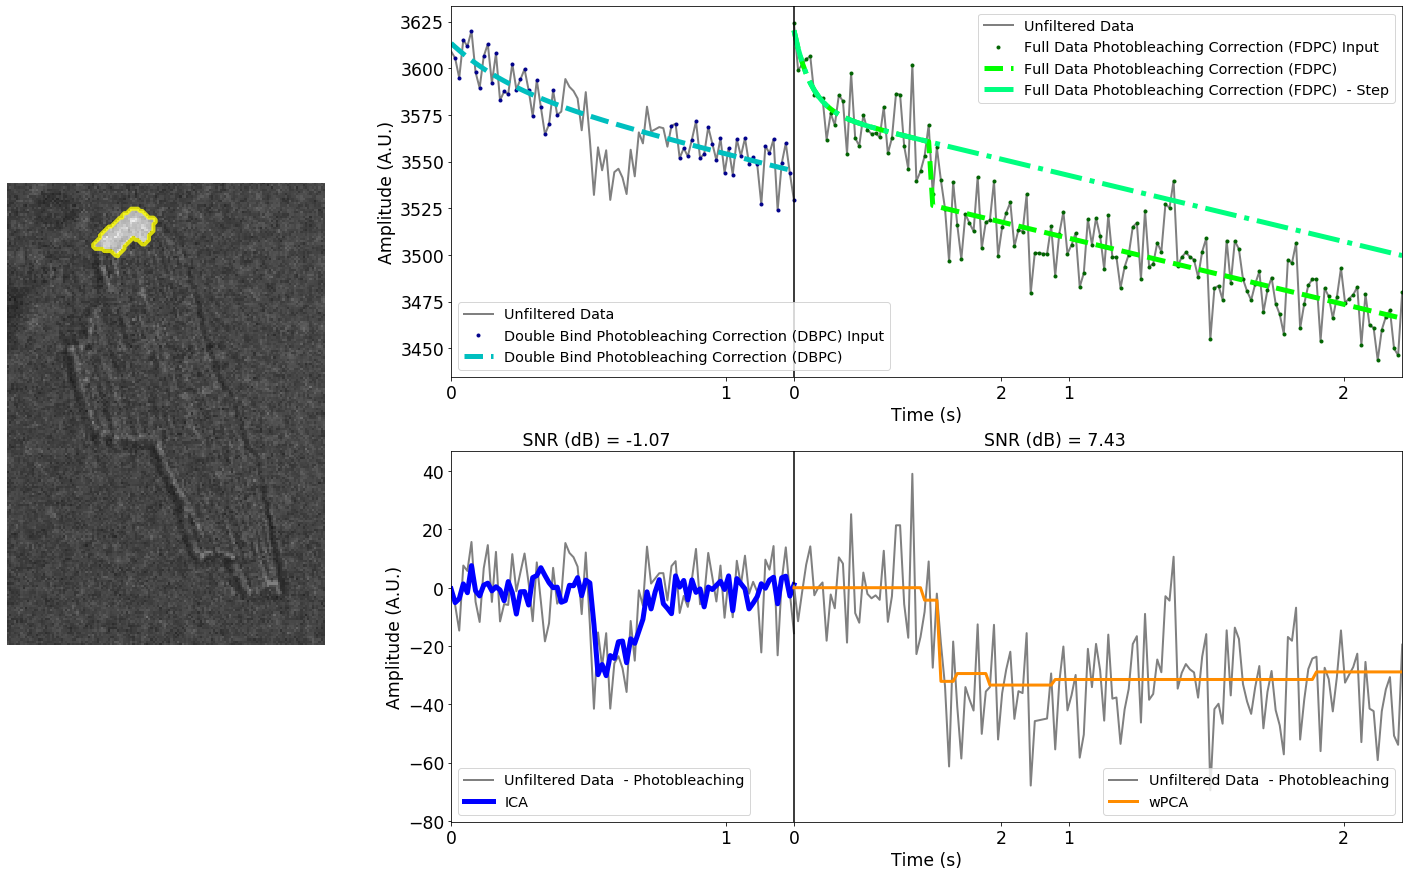

In [37]:
ymin = np.amin(ROIs_means_corrected_EP)
ymax = np.amax(ROIs_means_corrected_EP)
from scipy.optimize import curve_fit
from scipy.stats import linregress
for i in range(nregions): 

    plt.figure(figsize=[25,15])
    import matplotlib.gridspec as gridspec
    gs = gridspec.GridSpec(2, 2,
                           width_ratios=[1, 3],
                           height_ratios=[1, 1]
                           )
    ax1 = plt.subplot(gs[0:,0])
    snap = io.imread(os.path.join(fpath,'video_EP','snap.tif'))
    plt.imshow(snap,cmap='gray',vmin=0,vmax=np.amax(snap))
    contour = np.zeros_like(label_ROIs_EP,bool)
    contour = mes.build_contour(stack_ROIs_EP[i])
    plt.plot(contour[:,1],contour[:,0],color='yellow',lw=4,alpha=0.8)
    plt.imshow(stack_ROIs_EP[i],cmap='gray',alpha=0.5)
    ax1.axis('off')
    ##################################################################################
    ax2 = plt.subplot(gs[1])
    '''PLOT AP'''
    ax2.plot(time_AP,ROIs_means_AP[:,i],'-',color='gray',lw=2,label='Unfiltered Data')
    photobleaching = ROIs_means_AP[innactive_mask_AP,i]
    time_photob = time_AP[innactive_mask_AP]
    plt.plot(time_photob,photobleaching,'.',ms=6,color='darkblue',
             label='Double Bind Photobleaching Correction (DBPC) Input')

    y0 = np.mean(photobleaching[:5])
    yf = np.mean(photobleaching[-5:])
    #FIT #1:    linear fit
#     c, d = np.polyfit(time_photob,photobleaching,1)
    c, d, r_value, p_value, std_err = linregress(time_photob, photobleaching)
    p = np.poly1d([c,d])

     #FIT #2:    monoexp and line fit
    upper_bounds = [2*(y0-yf), 2*(np.log(d-(c*yf)-c)-np.log(y0-yf)), 2*(abs(c)), 2*yf]
    popt2, pcov2 = curve_fit(rpb.monoexp_and_line, time_AP[innactive_mask_AP], photobleaching, bounds=(0, upper_bounds))
    res_expline = photobleaching - rpb.monoexp_and_line(time_AP[innactive_mask_AP], *popt2)
    total_res_expline = np.sum(abs(res_expline**2))/len(photobleaching)

    #If any fit parameter gets close to its respective upper_boundary, expand upper_boundaries and retries fit   
    if np.all(np.greater(upper_bounds,popt2+0.01*(popt2)))==False:
        clip_flag = 1
        while(clip_flag==1):
            close = np.isclose(upper_bounds,popt2,atol=1e-02)
            if np.any(close)==False:  #if can't identify which parameter is clipped, duplicate all
                upper_bounds = np.multiply(2,upper_bounds)
            else:                     #if clipped parameter is identified, duplicate it
                closeidx = np.argwhere(close)[0][0]
                upper_bounds[closeidx] = np.multiply(2,upper_bounds[closeidx])
            popt2, pcov2 = curve_fit(rpb.monoexp_and_line, time_AP[innactive_mask_AP], photobleaching, bounds=(0, upper_bounds))
            res_expline = photobleaching - rpb.monoexp_and_line(time_AP[innactive_mask_AP], *popt2)
            total_res_expline = np.sum(abs(res_expline**2))/len(photobleaching)
            if np.all(np.greater(upper_bounds,popt2+0.01*(popt2)))==True:
                clip_flag = 0
            #Breaks if either exponential coefficient or linear coefficients overflow
            if (popt2[0]+popt2[3]>1.2*y0)|(popt2[1]<0.05):
                break
    plt.plot(time_AP, rpb.monoexp_and_line(time_AP, *popt2), 'c--',lw=5, 
             label='Double Bind Photobleaching Correction (DBPC)')
    # Create a legend for the first line.
    first_legend = plt.legend(loc='lower left',fontsize='x-large')

    # Add the legend manually to the current Axes.
    ax2 = plt.gca().add_artist(first_legend)

    '''PLOT SHOCK''' 
    disp = np.mean(ROIs_means_EP[0:5,i])-np.mean(ROIs_means_AP[0:5,i])
    curve1, = plt.plot(time_EP+time_AP[-1],ROIs_means_EP[:,i]-disp,'-',color='gray',lw=2,label='Unfiltered Data')
    photobleaching = ROIs_means_EP[innactive_mask_EP,i]
    time_photob = time_EP[innactive_mask_EP]
    curve2, = plt.plot(time_EP+time_AP[-1],ROIs_means_EP[:,i]-disp,'.',ms=6,color='darkgreen',
                       label='Full Data Photobleaching Correction (FDPC) Input')

    y0 = np.mean(photobleaching[:5])
    yf = np.mean(photobleaching[-5:])
    #FIT #1:    linear fit
#     c, d = np.polyfit(time_photob,photobleaching,1)
    c, d, r_value, p_value, std_err = linregress(time_photob, photobleaching)
    p = np.poly1d([c,d])
    #Assures y0 is bigger than yf for proper upper boundaries calculation
    if yf>=y0:
        if d>yf:
            y0 = d
        else:
            y0 = yf + 1
    #FIT #3:     monoexp, line and step fit
    upper_bounds = [2*(y0-yf), 2*(np.log(d-(c*yf)-c)-np.log(y0-yf)), 2*(abs(c)), 2*yf, (y0-yf)]
    popt3, pcov3 = curve_fit(lambda x, a, b, c, d, e: rpb.monoexp_line_step(x,a,b,c,d,e,t_sig_prop_EP[0]), time_EP, ROIs_means_EP[:,i], bounds=(0, upper_bounds))
    res_explinestep = ROIs_means_EP[:,i] - rpb.monoexp_line_step(time_EP, *np.insert(popt3,len(popt3),t_sig_prop_EP[0]))
    total_res_explinestep = np.sum(abs(res_explinestep**2))/len(ROIs_means_EP[:,i])
    #If any fit parameter gets close to its respective upper_boundary, expand upper_boundaries and retries fit 
    if np.all(np.greater(upper_bounds,popt3+0.01*(popt3)))==False:
        clip_flag = 1
        while(clip_flag==1):
            close = np.isclose(upper_bounds,popt3,atol=1e-02)
            if np.any(close)==False:  #if can't identify which parameter is clipped, duplicate all
                upper_bounds = np.multiply(2,upper_bounds)
            else:
                closeidx = np.argwhere(close)[0][0]
                upper_bounds[closeidx] = np.multiply(2,upper_bounds[closeidx])
            popt3, pcov3 = curve_fit(lambda x, a, b, c, d, e: rpb.monoexp_line_step(x,a,b,c,d,e,t_sig_prop_EP[0]), time_EP, ROIs_means_EP[:,i], bounds=(0, upper_bounds))
            res_explinestep = ROIs_means_EP[:,i] - rpb.monoexp_line_step(time_EP, *np.insert(popt3,len(popt3),t_sig_prop_EP[0]))
            total_res_explinestep = np.sum(abs(res_explinestep**2))/len(ROIs_means_EP[:,i])
            if np.all(np.greater(upper_bounds,popt3+0.01*(popt3)))==True:
                clip_flag = 0
            #Breaks if either exponential coefficient or linear coefficients overflow
            if (popt3[0]+popt3[3]>1.2*y0)|(popt3[1]<0.05):
                break

    curve3, = plt.plot(time_EP+time_AP[-1], rpb.monoexp_line_step(time_EP, *np.insert(popt3,len(popt3),t_sig_prop_EP[0]))-disp,
                       '--',color='lime', lw=5, label='Full Data Photobleaching Correction (FDPC)')
    popt3[-1] = 0
    testA = rpb.monoexp_line_step(time_EP, *np.insert(popt3,len(popt3),t_sig_prop_EP[0]))
    curve4, = plt.plot(time_EP+time_AP[-1], testA-disp, 
                       '-.',color='springgreen',lw=5,label='Full Data Photobleaching Correction (FDPC)  - Step')
    plt.axvline(x=time_AP[-1],color='k')
    plt.legend(handles=[curve1, curve2, curve3, curve4],fontsize='x-large',loc='upper right')
    plt.xlabel('Time (s)',size='xx-large')
    plt.ylabel('Amplitude (A.U.)',size='xx-large')
    plt.xticks([0,1,2,time_AP[-1],1+time_AP[-1],2+time_AP[-1],3+time_AP[-1],4+time_AP[-1]],('0','1','2','0','1','2','3','4'),fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.xlim(xmin=0,xmax=time_EP[-1]+time_AP[-1])
    ##################################################################################
    ax4 = plt.subplot(gs[3])
    plt.plot(time_AP,ROIs_means_corrected_AP[:,i],'-',color='gray',lw=2,label='Unfiltered Data  - Photobleaching')
    plt.plot(time_AP,ROIs_means_filtered_AP[:,i],'-',color='blue',lw=5,label='ICA')#,ms=10,mew=1,mec='k')

    # Create a legend for the first line.
    first_legend = plt.legend(fontsize='x-large',loc='lower left')

    # Add the legend manually to the current Axes.
    ax4 = plt.gca().add_artist(first_legend)
    
    
    plt.axvline(x=time_AP[-1],color='k')
    curve5, = plt.plot(time_EP+time_AP[-1],ROIs_means_corrected_EP[:,i],
                       '-',lw=2,color='gray',label='Unfiltered Data  - Photobleaching')
    curve6, = plt.plot(time_EP+time_AP[-1],ROIs_means_filtered_EP[:,i],
                       '-',color='darkorange',lw=3,label='wPCA')#,ms=10,mew=1,mec='k')

    plt.axis([0, time_EP[-1]+time_AP[-1], ymin, ymax])
    plt.legend(handles=[curve5, curve6],fontsize='x-large',loc='lower right')
    plt.xlabel('Time (s)',size='xx-large')
    plt.ylabel('Amplitude (A.U.)',size='xx-large')
    plt.xticks([0,1,2,time_AP[-1],1+time_AP[-1],2+time_AP[-1],3+time_AP[-1],4+time_AP[-1]],
               ('0','1','2','0','1','2','3','4'),fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.xlim(xmin=0,xmax=time_EP[-1]+time_AP[-1])
    title = '             SNR (dB) = ' + str(round(SNR_dB_AP[i],2)) + '                                                         SNR (dB) = ' + str(round(SNR_dB_EP[i],2))
    plt.title(title,fontsize='xx-large',loc='left')
    imname = os.path.join(output_path,'ROI#' + str(i) + '.tiff')
    plt.savefig(imname,bbox_inches='tight')
    if i!=0:
        plt.close()

#### Membrane potential (color scale) x ROI in 3 time instants
##### AP

Time instants =  [0.4  0.53 0.59] s

AP2= -60.24  at 0.40 s
AP3= -60.24  at 0.40 s
AP11= -60.24  at 0.40 s

AP2= 38.76  at 0.53 s
AP3= 38.76  at 0.53 s
AP11= 38.76  at 0.53 s

AP2= 16.53  at 0.59 s
AP3= 16.53  at 0.59 s
AP11= 16.53  at 0.59 s



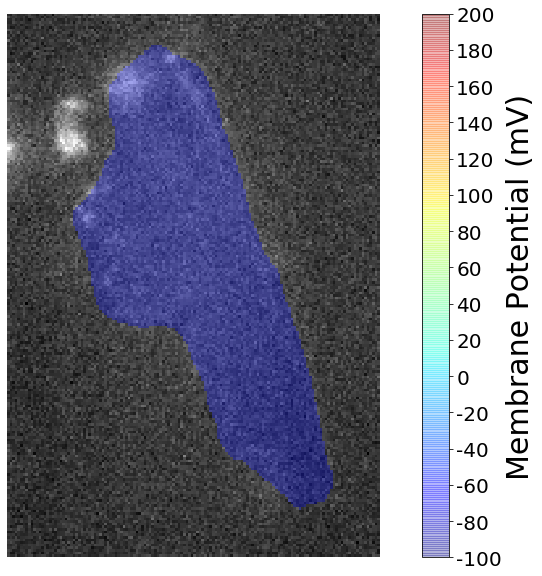

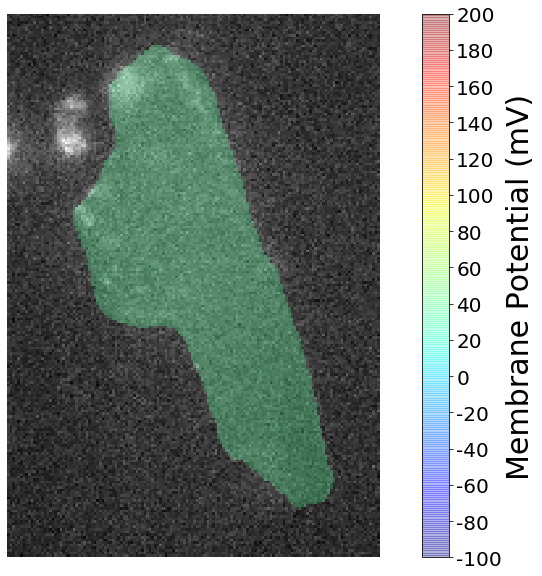

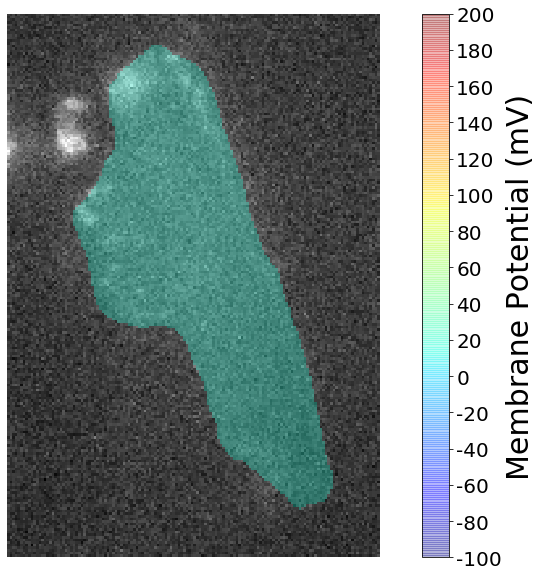

In [37]:
video_list = metroid.get_img_stacks(vmidpath)

from numpy.ma import masked_array
imname3 = 'AP_color_regions_'
lower_bound = -100
upper_bound=200

cmap = plt.cm.jet
norm = plt.Normalize(vmin=lower_bound, vmax=upper_bound)
i1 = np.argmin(abs(time_AP-t_sig_prop_AP[0]+0.1))#0.4sec
i2 = np.argmin(abs(time_AP-t_sig_prop_AP[0]))+2#0.5sec
i3 = np.argmin(abs(time_AP-t_sig_prop_AP[0]-0.1))#0.6sec

np.set_printoptions(precision=2,suppress=True)


i_vector = [i1, i2, i3]
print('Time instants = ',time_AP[i_vector],'s\n')
mask = np.zeros_like(label_ROIs_AP,bool)
mask[label_ROIs_AP>0] = True
for i in i_vector:
    segment_gray = np.zeros_like(label_ROIs_AP,int)
    for j in range(nregions):
        segment_gray[label_ROIs_AP==j+1] = segment_gray[label_ROIs_AP==j+1] + (AP_filt[i,j])
        
    v1a = masked_array(video_list[-1][i+1,:,:])
    v1b = masked_array(segment_gray,mask<=0)
    fig,ax = plt.subplots(figsize=[15,10])
    cax = ax.imshow(v1a,cmap='gray')

    cax1 = ax.imshow(v1b,cmap='jet',alpha=0.3,vmin=lower_bound,vmax=upper_bound)
    ax.axis('off')
    yticklabels=[-100,-80, -60, -40, -20, 0, 20, 40, 60, 80, 100, 120,140,160,180, 200]
    cbar = plt.colorbar(cax1,ticks=yticklabels)
    cbar.ax.set_ylabel('Membrane Potential (mV)',fontsize=30)
    cbar.ax.set_yticklabels(yticklabels,fontsize=20)
     # # Regions with striking different results
    print('AP2= %.2f' % AP_filt[i,1],' at %.2f' % time_AP[i],'s')
    print('AP3= %.2f' % AP_filt[i,2],' at %.2f' % time_AP[i],'s')
    print('AP11= %.2f' % AP_filt[i,10],' at %.2f' % time_AP[i],'s\n')
    imname = os.path.join(output_path,'AP_MembranePotential_at_' + str(np.floor(time_AP[i]).astype(int)) + '_' + str(np.around(time_AP[i]*1000).astype(int))[-3:] + '_sec.tiff')
    plt.savefig(imname,bbox_inches='tight')

#### Membrane potential (color scale) x ROI in 3 time instants
##### Electroporation

Time instants =  [0.   0.53 1.  ] s

EP2= -80.00  at 0.00 s
EP3= -80.00  at 0.00 s
EP11= -80.00  at 0.00 s

EP2= 257.79  at 0.53 s
EP3= 61.88  at 0.53 s
EP11= 1061.74  at 0.53 s

EP2= 251.04  at 1.00 s
EP3= 59.05  at 1.00 s
EP11= 1038.92  at 1.00 s



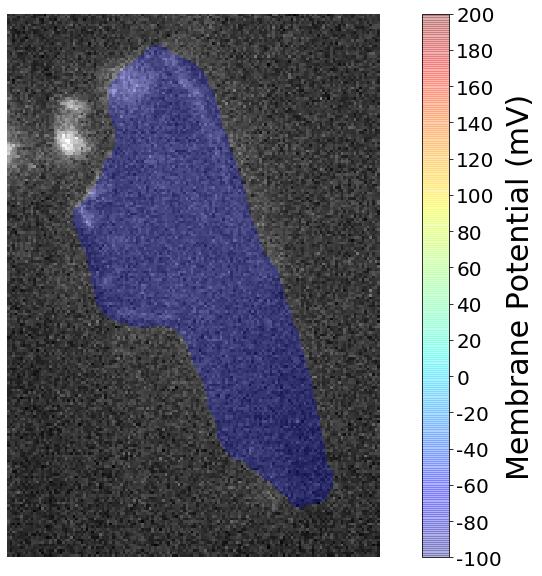

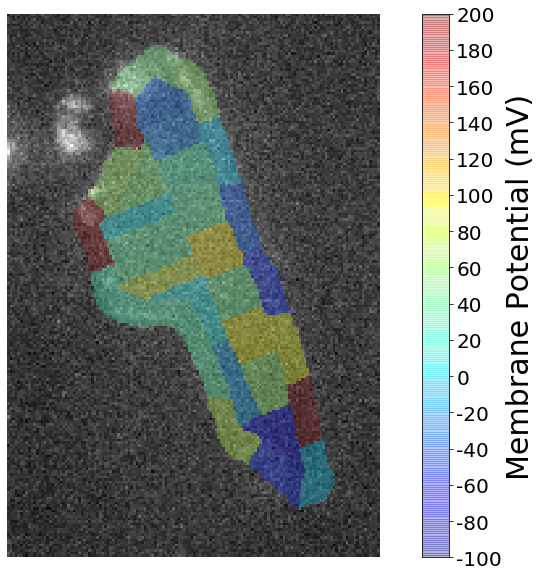

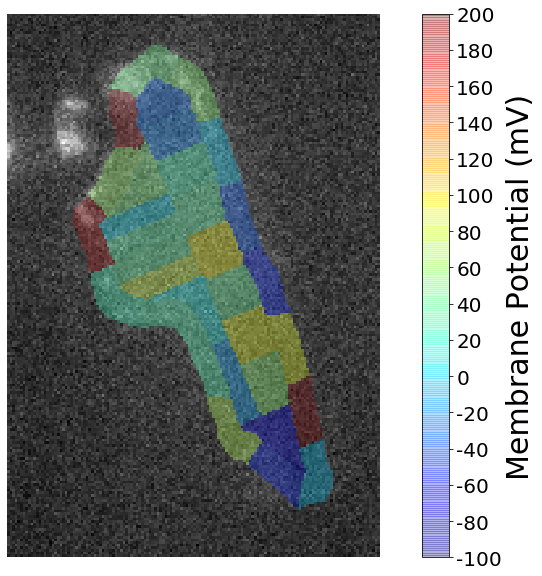

In [38]:
video_list = metroid.get_img_stacks(vlastpath)

from numpy.ma import masked_array
imname3 = 'EP_color_regions_'
lower_bound = -100
upper_bound=200

cmap = plt.cm.jet
norm = plt.Normalize(vmin=lower_bound, vmax=upper_bound)
i1 = np.argmin(abs(time_EP-t_sig_prop_EP[0]+0.5))#0sec
i2 = np.argmin(abs(time_EP-t_sig_prop_EP[0]))+2#0.5sec
i3 = np.argmin(abs(time_EP-t_sig_prop_EP[0]-0.5))#1sec

np.set_printoptions(precision=2,suppress=True)

i_vector = [i1, i2, i3]
print('Time instants = ',time_EP[i_vector],'s\n')
mask = np.zeros_like(label_ROIs_EP,bool)
mask[label_ROIs_EP>0] = True
for i in i_vector:
    segment_gray = np.zeros_like(label_ROIs_EP,int)
    for j in range(nregions):
        segment_gray[label_ROIs_EP==j+1] = segment_gray[label_ROIs_EP==j+1] + (EP_filt[i,j])
        
    v1a = masked_array(video_list[-1][i+1,:,:])
    v1b = masked_array(segment_gray,mask<=0)
    fig,ax = plt.subplots(figsize=[15,10])
    cax = ax.imshow(v1a,cmap='gray')

    cax1 = ax.imshow(v1b,cmap='jet',alpha=0.3,vmin=lower_bound,vmax=upper_bound)
    ax.axis('off')
    yticklabels=[-100,-80, -60, -40, -20, 0, 20, 40, 60, 80, 100, 120,140,160,180, 200]
    cbar = plt.colorbar(cax1,ticks=yticklabels)
    cbar.ax.set_ylabel('Membrane Potential (mV)',fontsize=30)
    cbar.ax.set_yticklabels(yticklabels,fontsize=20)
    # # Regions with striking different results
    print('EP2= %.2f' % EP_filt[i,1],' at %.2f' % time_EP[i],'s')
    print('EP3= %.2f' % EP_filt[i,2],' at %.2f' % time_EP[i],'s')
    print('EP11= %.2f' % EP_filt[i,10],' at %.2f' % time_EP[i],'s\n')
    imname = os.path.join(output_path,'EP_MembranePotential_at_' + str(np.floor(time_EP[i]).astype(int)) + '_' + str(np.around(time_EP[i]*1000).astype(int))[-3:] + '_sec.tiff')
    plt.savefig(imname,bbox_inches='tight')

__Warning: Our computer simulations have shown that ROIs with SNR < -10dB for AP videos and SNR < -12.5dB for electroporation videos can lead to amplitude errors higher than 10%, therefore, we do not recommend relying in ROI results when SNR < -10dB. (Always check the SNR vs ROI# figure a few cells above)__

__It should be noted that, in this case, all dark red ROIs had a SNR < -14dB (ROI#11 SNR is -31dB! Check the figure of SNR vs ROI# a few cells above).__